# Red Wine Quality Prediction

## Problem Statement:

The dataset is related to red wine.

## Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

Dataset Used:
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

--------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
print("Rows, columns: " + str(df.shape))
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


--------------------------------------------------------------------------------------------------------------------------

### Description of the features

1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of free + bound forms of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt in the wine
8. Fixed acidity: are non-volatile acids that do not evaporate readily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)
12. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7).
-------------------------------------------------------------------------------------------------------------------------

## Objectives  :

1. ML modelling with different classification algorithm to build model with highest accuracy which in turns lead to predicting quality of wine in term of good or not good.
2. With help of EDA to determine which features are the most indicative of a good quality wine
--------------------------------------------------------------------------------------------------------------------------

# Statsical Summary

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Mean feature values as per different quality grade

In [6]:
means = pd.pivot_table(data=df, index='quality',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 'citric acid':np.mean, 
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
quality,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,0.423333


#### Comment-
##### based on mean value quality
1. Good quality (grade 7 & 8) of wine posses higher amount of alcohol, citric acid, fixed acidity, sulphates.
2. Good quality (grade 7 & 8) of wine posses lower amount of Chlorides, low pH value,volatile acidity.
3. Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.
4. Density and residual sugar are not deciding factor in determining quality of wine.
--------------------------------------------------------------------------------------------------------------------------

####  Create Classification version of target variable
We will create two class for purpose of classification based on quality grade of red wine
1. class 1- Good quality red wine - if a quality grade of 7 or higher
2. class 2- Low quality red wine - if a quality grade less than 7

In [7]:
df['class'] =[1 if x >= 7 else 0 for x in df['quality']]

In [18]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

In [8]:
df1=df.drop(columns='quality')

---------------------------------------------------------------------------------------------------------------------------

#### Mean feature values based on class

In [9]:
means = pd.pivot_table(data=df, index='class',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 'citric acid':np.mean, 
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
class,,,,,,,,,,
0,10.251037,0.089281,0.254407,0.996859,8.236831,16.172214,3.314616,2.512120,0.644754,0.547022
1,11.518049,0.075912,0.376498,0.996030,8.847005,13.981567,3.288802,2.708756,0.743456,0.405530


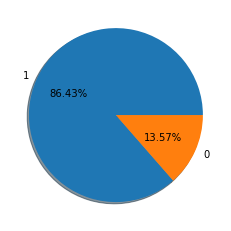

In [52]:
labels = '1','0',
fig, ax = plt.subplots()
ax.pie(df['class'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

---------------------------------------------------------------------------------------------------------------------------

#### Checking null value or missing data

<AxesSubplot:>

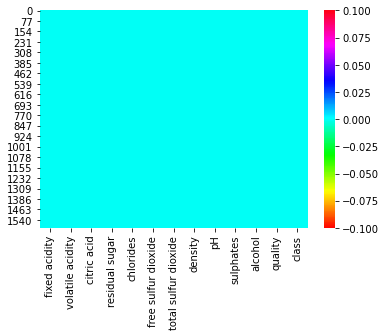

In [10]:
sns.heatmap(df.isnull(), cmap='hsv')

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                      Missing Values  % Missing data
class                              0             0.0
quality                            0             0.0
alcohol                            0             0.0
sulphates                          0             0.0
pH                                 0             0.0
density                            0             0.0
total sulfur dioxide               0             0.0
free sulfur dioxide                0             0.0
chlorides                          0             0.0
residual sugar                     0             0.0
citric acid                        0             0.0
volatile acidity                   0             0.0
fixed acidity                      0             0.0


# Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

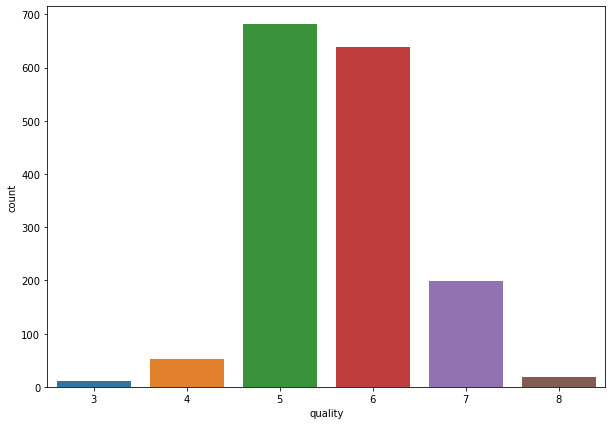

In [12]:
plt.figure(figsize =(10, 7))
sns.countplot(df['quality'])

In [13]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Figure size 720x720 with 0 Axes>

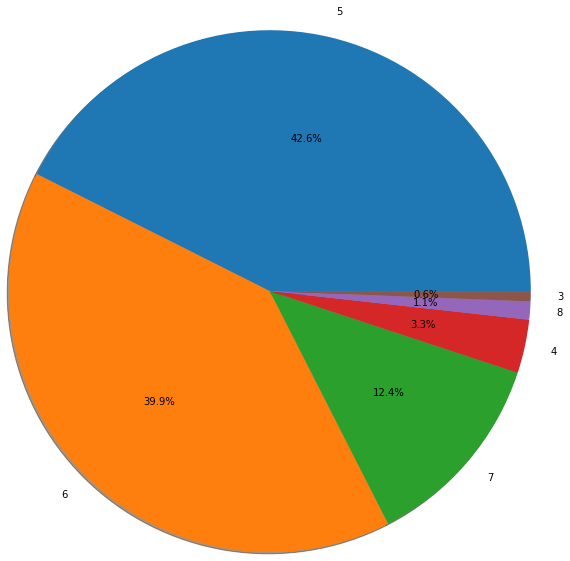

In [51]:
plt.figure(figsize=(10,10))
labels = '5','6','7','4','8','3'
fig, ax = plt.subplots()
ax.pie(df['quality'].value_counts(),labels = labels,radius =3 ,autopct = '%1.1f%%', shadow=True,)
plt.show()

#### Comment -
1. Majority of wine samples are of quality level 5 and 6.
2. This dataset we have only 217 wine sample with higher quality grade.
----------------------------------------------------------------------------------------------------------------

#### Distribution of features :

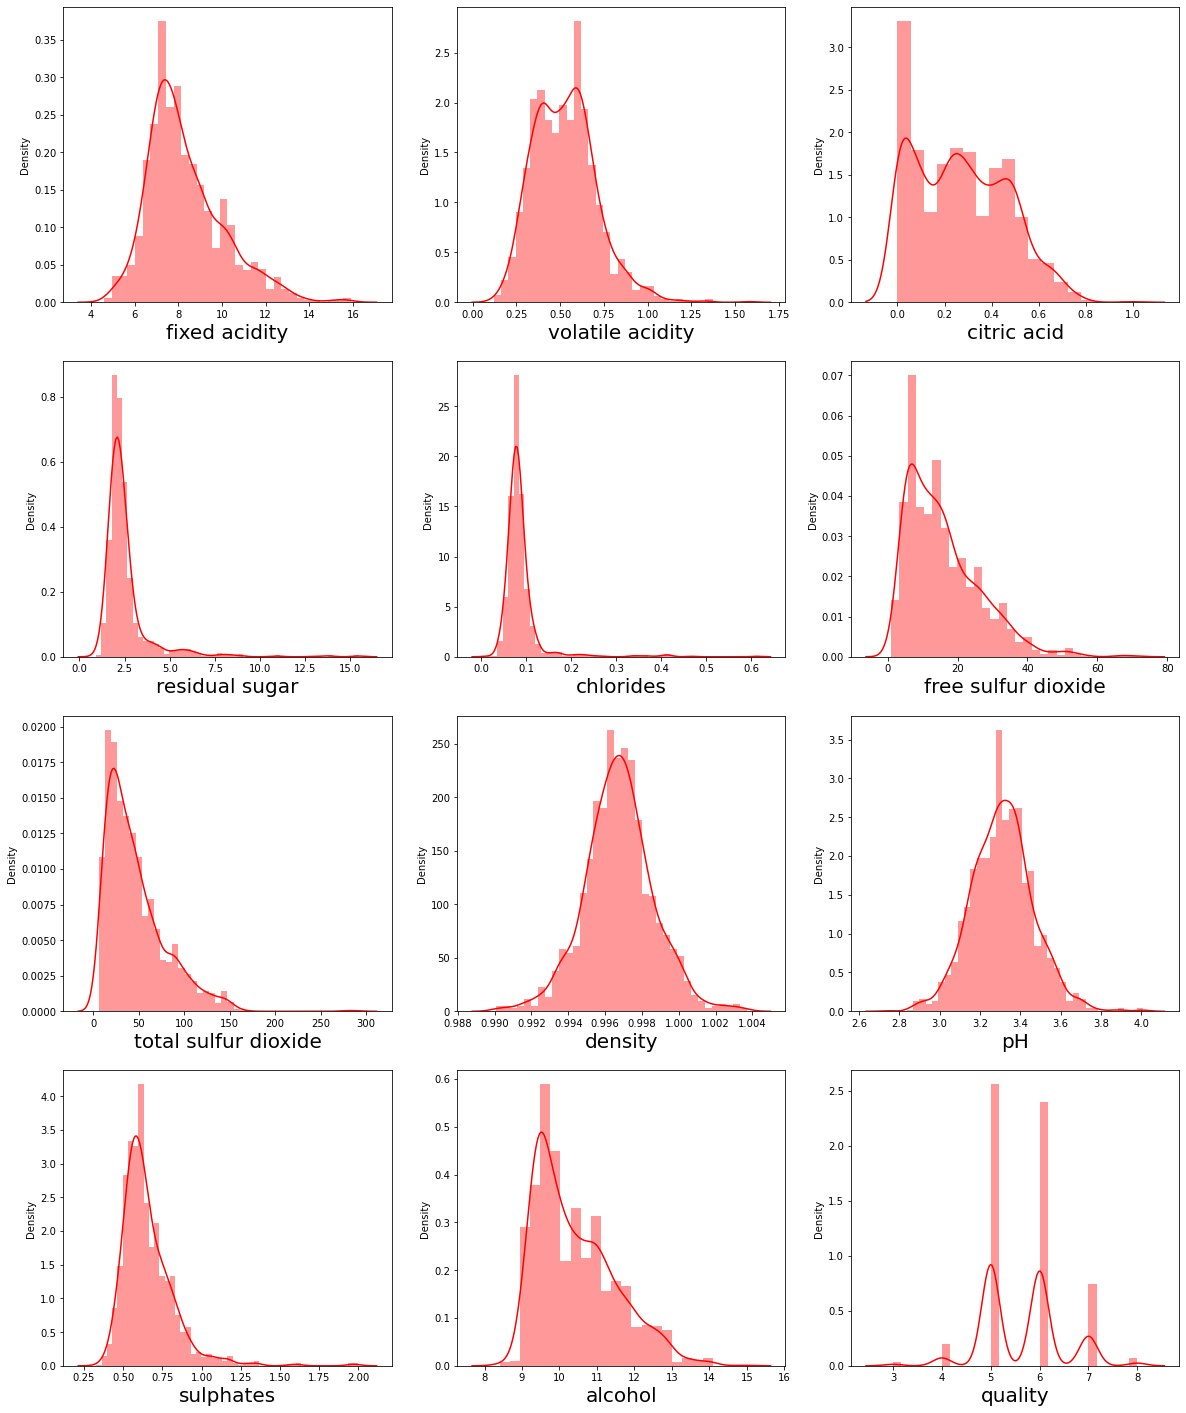

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Comment - 

There is skewness in data

---------------------------------------------------------------------------------------------------------------------------

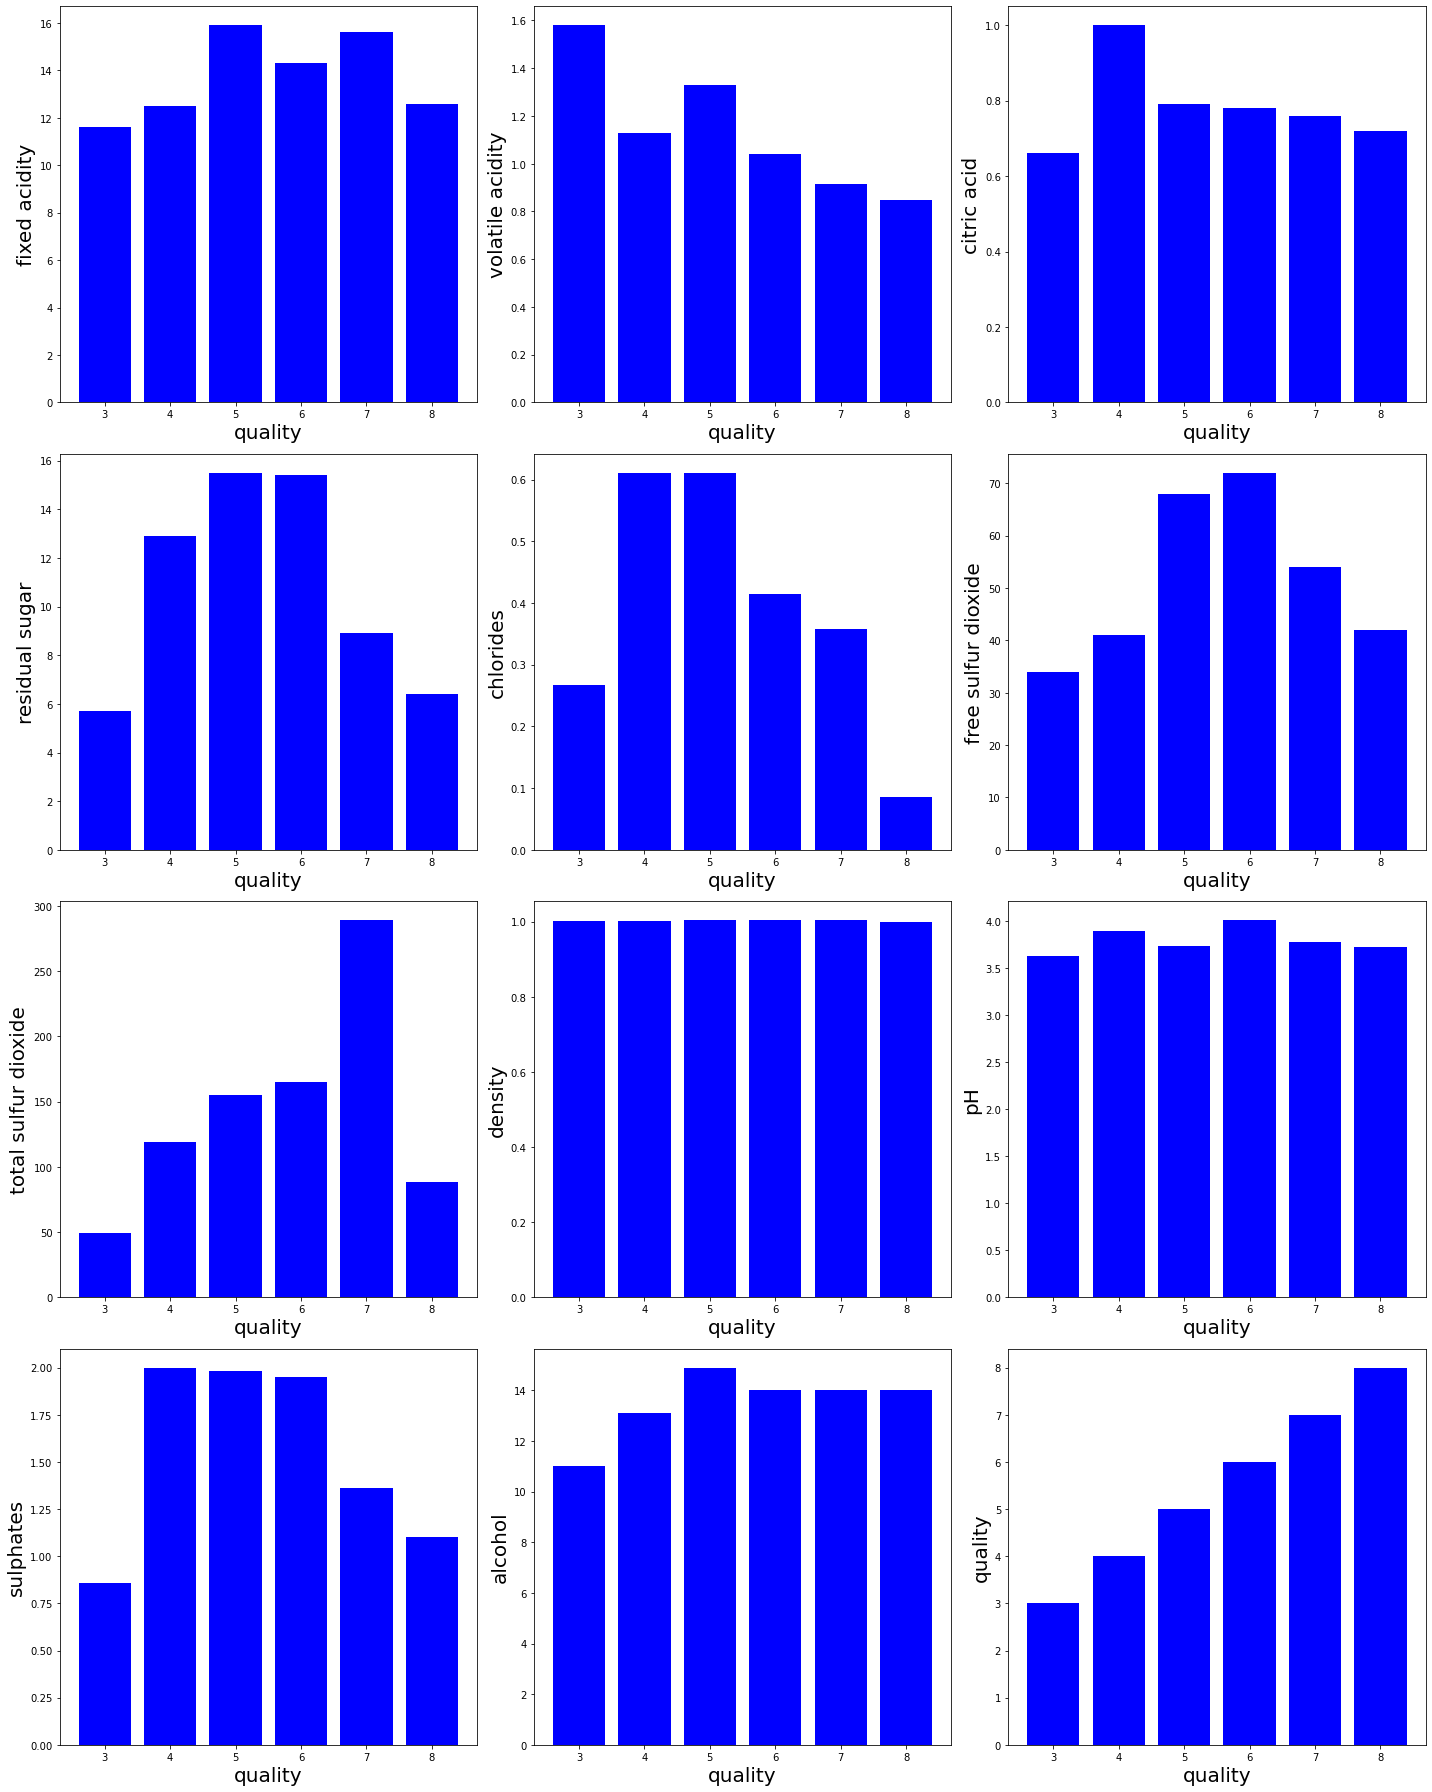

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[column], color='b') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Comment-
##### Based on quality
1. Good quality (grade 7 & 8) of wine posses higher amount of alcohol, fixed acidity.
2. Good quality (grade 7 & 8) of wine posses lower amount of low pH value,volatile acidity.
3. Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.
4. Density and residual sugar are not deciding factor in determining quality of wine.
5. Low grade quality of wine posses lower amount of total sulfer dioxide.
6. Higher volatile acid lower the quality of wine.
--------------------------------------------------------------------------------------------------------------------------

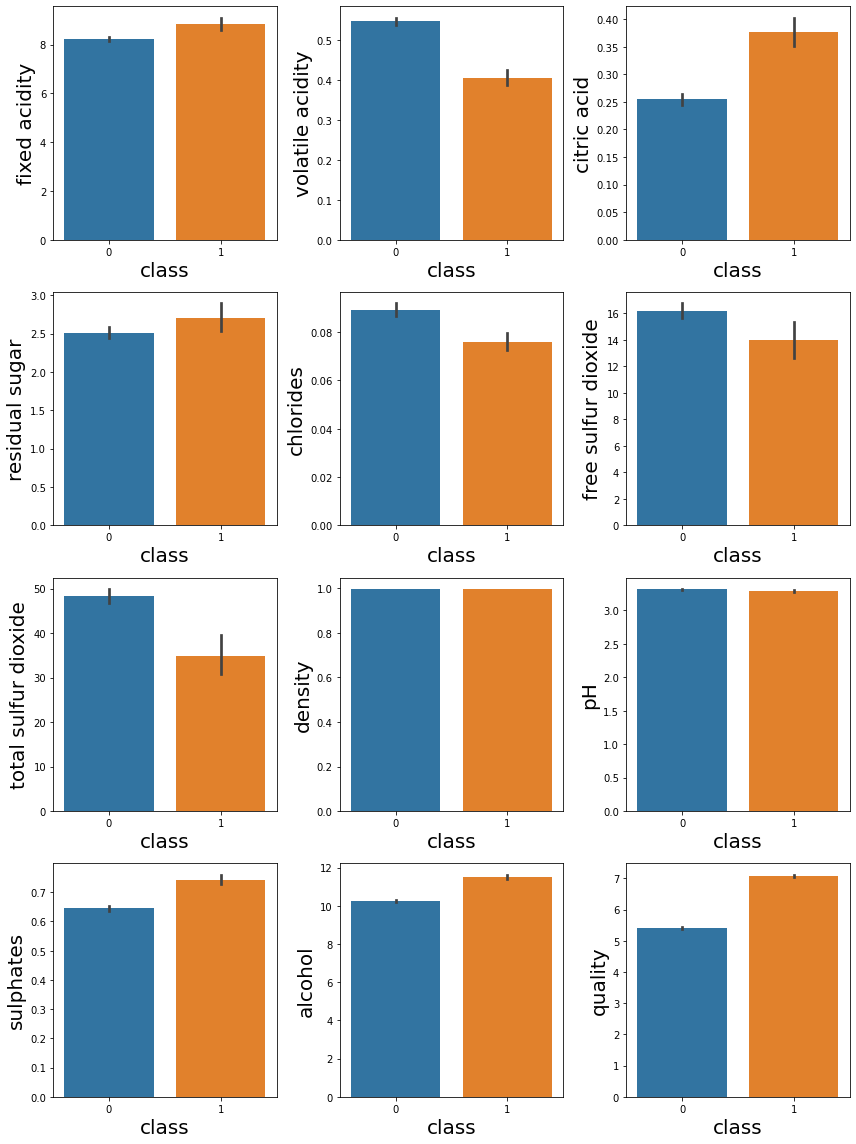

In [16]:
plt.figure(figsize=(12,16), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.barplot(df['class'],df[column]) 
        plt.xlabel('class',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()
# class 1 - good quality
# class 0 - low quality

#### Comment - 
1. Quality of wine increase with increase in alcohol, sulpates, residual sugar, citric acid,fixed acidity.
2. Quality of wine decreses with increase in total sulfur dioxide,chlorides, volatile acidity,free sulfur dioxide.

In [27]:
Grp_c=df.groupby('class')
C_1=Grp_c.get_group(1)
C_2=Grp_c.get_group(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


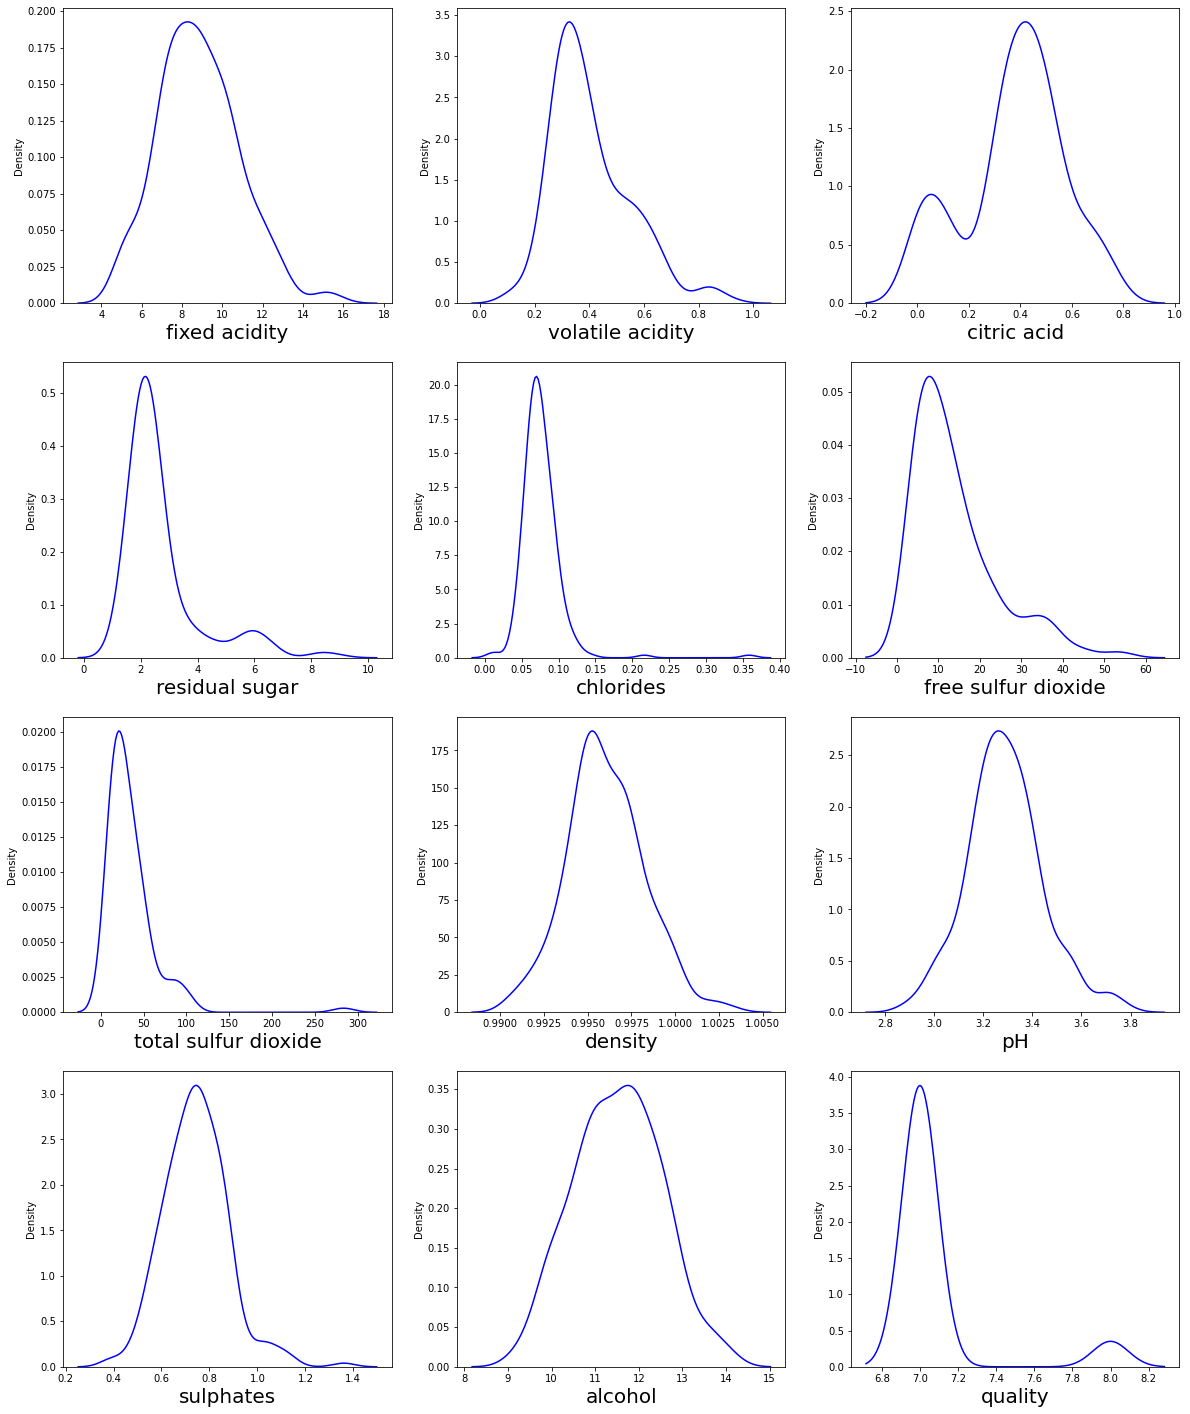

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in C_1:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.kdeplot(C_1[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

---------------------------------------------------------------------------------------------------------------------------

# Feature selection

## Outliers Detection basesd on IQR 

In [73]:
df2 =df1.copy()
Q1 =df2.quantile(0.25)
Q3= df2.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
class                    0.000000
dtype: float64


In [74]:
df_new =df2[~((df <(Q1 - 1.5*IQR)) | (df >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(1047, 12)


##### Data Loss

In [75]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1047)/1599)*100,'%')

Percentage Data Loss : 34.52157598499062 %


There is significant data loss  with IQR method.

## Removing Outliers using Z score Method

In [164]:
from scipy.stats import zscore
df3=df1.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)
df_new= df3[(z_score_abs < 3).all(axis=1)]
df_new.shape

(1458, 12)

##### Data Loss

In [81]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1458)/1599)*100,'%')

Percentage Data Loss : 8.818011257035648 %


--------------------------------------------------------------------------------------------------------------------------

## Skewness detection and transformation

In [165]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                   2.103030
dtype: float64

##### Data is highly skewed. So it need to transform

#### Transforming positive or right skew data using boxcox transformation

In [89]:
from scipy.stats import boxcox

In [166]:
df_new['fixed acidity']=boxcox(df_new['fixed acidity'],0)
df_new['residual sugar']=boxcox(df_new['residual sugar'],-1)
df_new['chlorides']=boxcox(df_new['chlorides'],-0.5)
df_new['free sulfur dioxide']=boxcox(df_new['free sulfur dioxide'],0)
df_new['total sulfur dioxide']=boxcox(df_new['total sulfur dioxide'],0)
df_new['sulphates']=boxcox(df_new['sulphates'],0)
df_new['alcohol']=boxcox(df_new['alcohol'],-0.5)

In [167]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
class                   2.103030
dtype: float64

--------------------------------------------------------------------------------------------------------------------------

### Correlation 

In [124]:
df_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
fixed acidity,1.000000,-0.295813,0.692400,0.216829,0.241177,-0.170132,-0.096951,0.664021,-0.721165,0.190975,-0.037563,0.119643
volatile acidity,-0.295813,1.000000,-0.589286,0.039221,0.080724,0.046278,0.099221,-0.000446,0.252900,-0.356126,-0.212683,-0.268236
citric acid,0.692400,-0.589286,1.000000,0.187498,0.100659,-0.107676,-0.027290,0.372338,-0.521270,0.308570,0.162704,0.226809
residual sugar,0.216829,0.039221,0.187498,1.000000,0.219573,0.034795,0.126538,0.398875,-0.073404,0.063047,0.152463,0.073978
chlorides,0.241177,0.080724,0.100659,0.219573,1.000000,-0.012947,0.095544,0.414090,-0.206719,-0.010645,-0.278623,-0.144047
free sulfur dioxide,-0.170132,0.046278,-0.107676,0.034795,-0.012947,1.000000,0.778888,-0.041086,0.132344,0.045477,-0.090153,-0.095752
total sulfur dioxide,-0.096951,0.099221,-0.027290,0.126538,0.095544,0.778888,1.000000,0.140454,0.032708,0.006369,-0.269103,-0.183569
density,0.664021,-0.000446,0.372338,0.398875,0.414090,-0.041086,0.140454,1.000000,-0.311217,0.133096,-0.462380,-0.154221
pH,-0.721165,0.252900,-0.521270,-0.073404,-0.206719,0.132344,0.032708,-0.311217,1.000000,-0.025521,0.138230,-0.079528
sulphates,0.190975,-0.356126,0.308570,0.063047,-0.010645,0.045477,0.006369,0.133096,-0.025521,1.000000,0.255667,0.312522


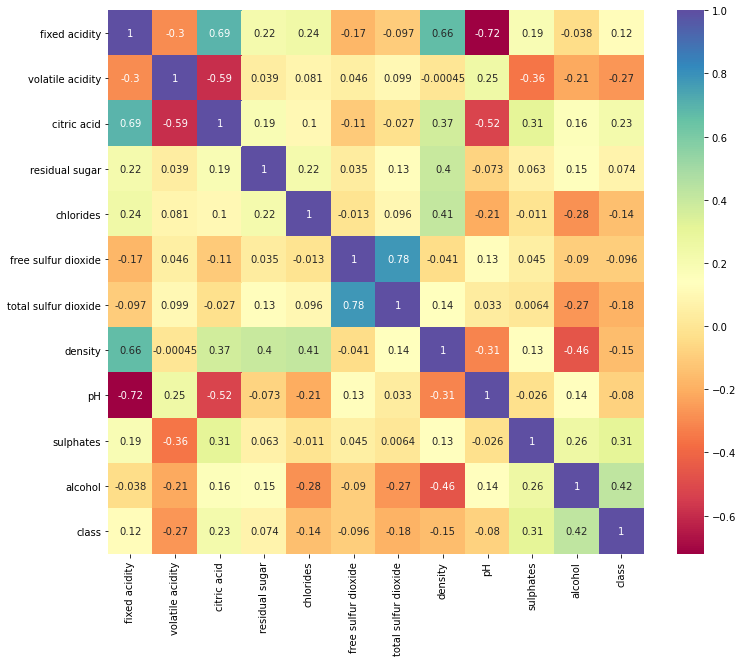

In [125]:
plt.figure(figsize =(12,10))
sns.heatmap(df_new.corr(), annot= True ,cmap='Spectral')
# cmap =PiYG cmap='Spectral'
plt.tight_layout
plt.show()

#### Visualizing correlation of feature columns with label column.

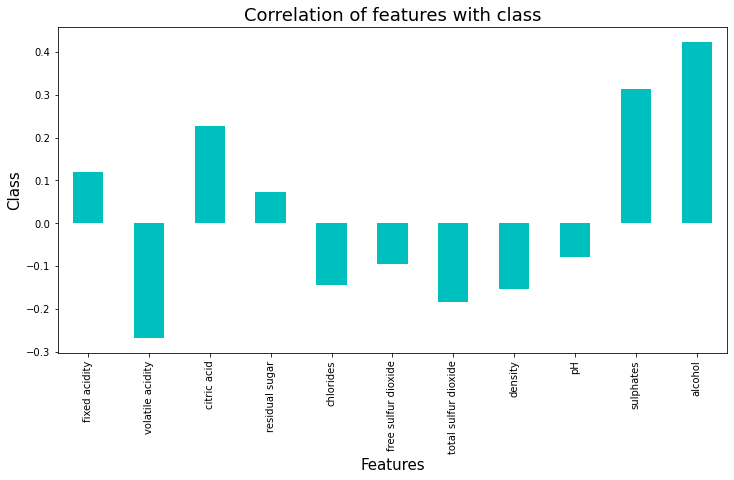

In [126]:
plt.figure(figsize = (12,6))
df_new.corr()['class'].drop(['class']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Class',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

#### Checking Multicollinearity between features using variance_inflation_factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
df_new2=df_new.copy()

In [171]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

,vif,Features
0,438.548030,fixed acidity
1,19.154557,volatile acidity
2,8.924413,citric acid
3,28.228238,residual sugar
4,50.847679,chlorides
5,43.111998,free sulfur dioxide
6,89.150536,total sulfur dioxide
7,5749.315171,density
8,1309.140274,pH
9,8.733061,sulphates


#### pH, density are not contributing to label and also high multicollinearity exists. so we will drop density.

In [172]:
df_new2= df_new2.drop(['density','pH'], axis=1)

In [173]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

,vif,Features
0,221.761299,fixed acidity
1,19.013857,volatile acidity
2,8.261869,citric acid
3,27.170221,residual sugar
4,50.520413,chlorides
5,41.606170,free sulfur dioxide
6,76.519033,total sulfur dioxide
7,8.227630,sulphates
8,333.721403,alcohol
9,1.452193,class


##### Still there are lot of multicollinearity. So we need to scale data and apply pca dimensionilty reduction technique.

### Standard Scaling

In [174]:
X= df_new.drop(columns=['class'])
Y= df_new['class']

In [175]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [176]:
X_scale

array([[-0.51360254,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.60954326, -1.04551382],
       [-0.23702113,  2.10132549, -1.38741253, ..., -0.82375195,
         0.39246697, -0.58517226],
       [-0.23702113,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.15960713, -0.58517226],
       ...,
       [-1.35910388, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.89812923,  0.64182987],
       [-1.70374108,  0.71401945, -0.75981623, ...,  1.80028837,
         0.6152721 , -0.15218234],
       [-1.61543928, -1.26362959,  1.07067297, ...,  0.52372821,
         0.23840028,  0.64182987]])

## PCA 

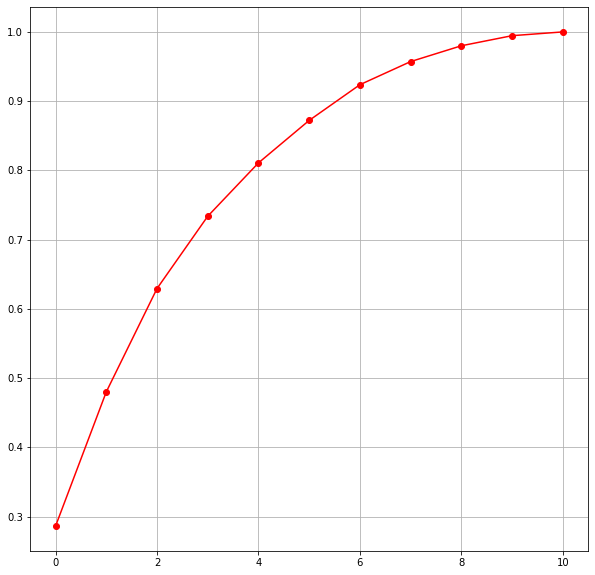

In [177]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

#### Comment -
###### AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data.  We shall pick the first 8 components for our prediction

In [179]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_scale)
print(x_new)

[[ 1.68650741e+00 -1.13427713e+00  1.20466448e+00 ... -8.36247920e-01
  -2.80279751e-01 -4.99499195e-01]
 [ 6.94317615e-01 -2.37831525e+00  1.67711310e-01 ...  2.59097937e-01
   1.86103085e+00  8.57316030e-01]
 [ 6.25870099e-01 -1.60320594e+00  5.11187315e-01 ...  1.11415879e-01
   1.10007379e+00  5.67815471e-01]
 ...
 [ 1.52905689e+00 -8.18231397e-03 -1.51777109e+00 ...  2.95236388e-01
   1.74538537e-01  3.66013706e-01]
 [ 2.60038294e+00 -6.48382815e-01 -1.18250554e+00 ... -3.77583301e-02
  -1.31893672e-03 -2.86682942e-01]
 [ 4.02630212e-01  7.89189967e-01 -1.87281620e+00 ...  1.93469807e-01
  -1.56509536e+00  7.27199628e-01]]


# Machine Learning Model Building

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1020, 8)
Training target vector size: (1020,)
Test feature matrix size: (438, 8)
Test target vector size: (438,)


### Finding best Random state

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(x_new,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9246575342465754 on Random_state 133


---------------------------------------------------------------------------------------------------------------------------

## Logistics Regression

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=133, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9128630705394191


Confusion matrix of Logistics Regression : 
 [[420  10]
 [ 32  20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       430
           1       0.67      0.38      0.49        52

    accuracy                           0.91       482
   macro avg       0.80      0.68      0.72       482
weighted avg       0.90      0.91      0.90       482



--------------------------------------------------------------------------------------------------------------------------

### Finding Optimal value of n_neighbors for KNN

In [195]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34986660172721457
RMSE value for k=  2 is: 0.3089266654843879
RMSE value for k=  3 is: 0.3408556477661884
RMSE value for k=  4 is: 0.32207831320041547
RMSE value for k=  5 is: 0.33159991891444485
RMSE value for k=  6 is: 0.31884126307199384
RMSE value for k=  7 is: 0.32528315147069237
RMSE value for k=  8 is: 0.31884126307199384
RMSE value for k=  9 is: 0.31226651028245633
RMSE value for k=  10 is: 0.302136239226515
RMSE value for k=  11 is: 0.31226651028245633
RMSE value for k=  12 is: 0.29868314022934306
RMSE value for k=  13 is: 0.3089266654843879
RMSE value for k=  14 is: 0.29868314022934306
RMSE value for k=  15 is: 0.31226651028245633
RMSE value for k=  16 is: 0.302136239226515
RMSE value for k=  17 is: 0.31226651028245633
RMSE value for k=  18 is: 0.32207831320041547
RMSE value for k=  19 is: 0.32528315147069237
RMSE value for k=  20 is: 0.3155710098229302


<AxesSubplot:>

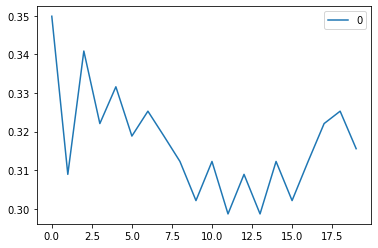

In [196]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#### Comment- 
At k= 12, the RMSE is approximately 0.29868314022934306, and shoots up on further increasing the k value. We can safely say that k=12 will give us the best result in this case

---------------------------------------------------------------------------------------------------------------------------

In [202]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9128630705394191


Confusion matrix : 
 [[419  11]
 [ 31  21]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.66      0.40      0.50        52

    accuracy                           0.91       482
   macro avg       0.79      0.69      0.73       482
weighted avg       0.90      0.91      0.90       482



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.9087136929460581


Confusion matrix : 
 [[417  13]
 [ 31  21]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.62      0.40      0.49        52

    accuracy                           0.91       482
   macro avg       0.77      0.69      0.72       482
weighted avg       0.90      0.91      0.90       482




# Final Model

In [221]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.91701244813278


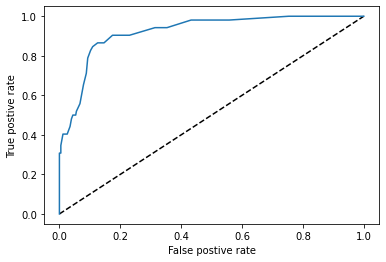

Auc Score :
 0.6914579606440071


In [222]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving model

In [223]:
import joblib
joblib.dump(Final_mod,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']